# 70k simulation: RNO_album_10_10_2025

## Graph of # events vs. Time to consolidate

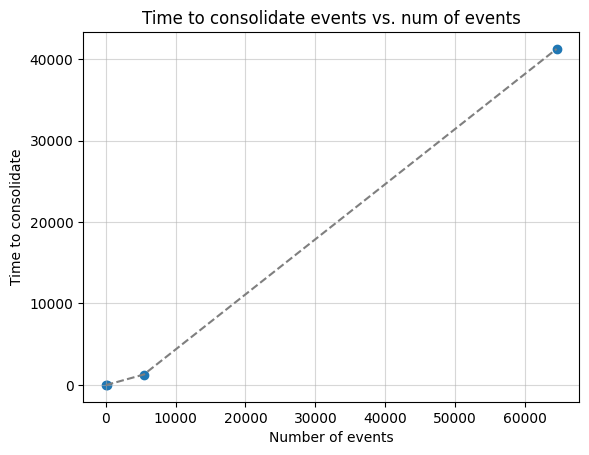

In [1]:
# Utilizing time number of events data from simulation:

import matplotlib.pyplot as plt

plt.title('Time to consolidate events vs. num of events')
plt.scatter([10,149,5467,64485],[0.37,7,1277,41244])
plt.plot([10,149,5467,64485],[0.37,7,1277,41244],ls='--',color='tab:gray')
plt.xlabel('Number of events')
plt.ylabel('Time to consolidate')
plt.grid(True,alpha=0.5)

## Look at time for each step

In [28]:
import glob
import numpy as np

n1_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step1*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n1_runtimes.append(value)
                except Exception:
                    continue

###

n2_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step2*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n2_runtimes.append(value)
                except Exception:
                    continue

###

n3_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n3_runtimes.append(value)
                except Exception:
                    continue

if n1_runtimes:
    avg_n1_runtime = np.mean(n1_runtimes)
    std_n1_runtime = np.std(n1_runtimes)
    print(f"Average s1 runtime: {avg_n1_runtime:.2f} s (std: {std_n1_runtime:.2f} s)")
else:
    print("No n1_runtimes found.")

if n2_runtimes:
    avg_n2_runtime = np.mean(n2_runtimes)
    std_n2_runtime = np.std(n2_runtimes)
    print(f"Average s2 runtime: {avg_n2_runtime:.2f} s (std: {std_n2_runtime:.2f} s)")
else:
    print("No n2_runtimes found.")

if n3_runtimes:
    avg_n3_runtime = np.mean(n3_runtimes)
    std_n3_runtime = np.std(n3_runtimes)
    print(f"Average s3 runtime: {avg_n3_runtime:.2f} s (std: {std_n3_runtime:.2f} s)")
else:
    print("No n3_runtimes found.")


Average s1 runtime: 9.56 s (std: 3.32 s)
Average s2 runtime: 1407.22 s (std: 455.73 s)
Average s3 runtime: 0.77 s (std: 0.51 s)


## Results

* Simulations ran: 4096
* Number of neutrinos per simulation: 1000
* Number of simulations that did not have any detections: 78
* Time spent in step4_n1 = 41_244 seconds (11.45 hours)
* Time spent in step4_n2 = 1277 seconds (21 minutes | 0.35 hours)
* Time spent in step4_n3 = 7 seconds
* Time spent in step4_n4 = 0.37 seconds
* avg. time for stepOne = 9.55 seconds
* avg. time for stepTwo = 1411.69 seconds
* avg. time for stepThree = 0.78 seconds
* TOTAL training time = 126_066 seconds (1 day, 11 hours)

<Strong>Important Note</Strong>: Apparently, the cap for step2 simulations at one time is 285, which is good to know:

For example, to do 100_000 events, which would mostly be composed of waiting for step2 (assuming step4 is efficient (WHICH IS A BAD ASSUMPTION)) I will need:

(100_000)(9.5+1411+1)/250 = 568600 seconds = 6.6 days. Feasable, definitely, but I am afraid step 4 and so on will take a lot longer!

# 40K simulation: RNO_album_10_12_2025

* n1: 38101, n2: 2990, n3: 20. n4: 0, total: 41111
* Ratios: n1/total = 92.6784%, n2/total = 7.2730%, n3/total = 0.0486%,  n4/total = 0.0000%
* Number of "interesting" events: 15 (Seem to be flukes)

## Look at time windows

425
9208.291783194069
6713.423244167376
649.8190202626058
95th percentile: 8296.37 ns
Number of events above 95 percentile: 22


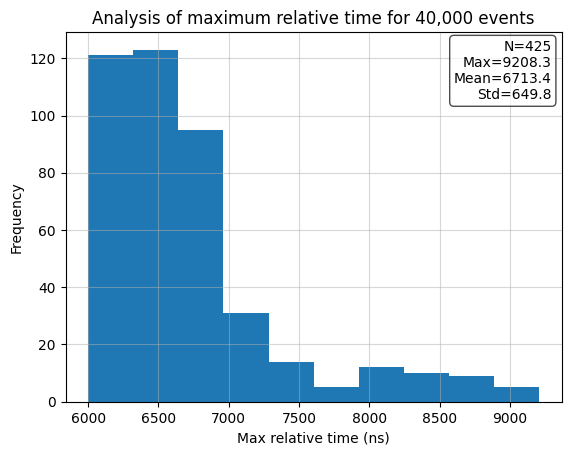

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

jobs_logs_path = '/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs'

max_rel_times = []
for file_path in glob.glob(f'{jobs_logs_path}/step3*.out'):
    with open(file_path) as f:
        for line in f:
            if 'Relative Time Maximum:' in line:
                rel_time = float(line.split(':')[1].split()[0])
                max_rel_times.append(rel_time)

max_rel_times = np.array(max_rel_times)

# Calculate statistics
count = len(max_rel_times)
max_val = np.max(max_rel_times)
mean_val = np.mean(max_rel_times)
std_val = np.std(max_rel_times)

# Print statistics
print(count)
print(max_val)
print(mean_val)
print(std_val)

# Annotate statistics on the plot
stats_text = f'N={count}\nMax={max_val:.1f}\nMean={mean_val:.1f}\nStd={std_val:.1f}'
plt.annotate(stats_text, xy=(0.98, 0.98), xycoords='axes fraction',
             fontsize=10, ha='right', va='top',
             bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.7))
plt.title('Analysis of maximum relative time for 40,000 events')
plt.ylabel('Frequency')
plt.xlabel('Max relative time (ns)')
plt.grid(True,alpha=0.5)
plt.hist(max_rel_times)
# Print the < 95 percentile of this distribution
percentile_95 = np.percentile(max_rel_times, 95)
print(f"95th percentile: {percentile_95:.2f} ns")
above_95 = np.sum(max_rel_times > percentile_95)
print(f'Number of events above 95 percentile: {above_95}')

THIS SUGGESTS THAT I SHOULD INCREASE THE TIME WINDOW TO 8k!

## For maximum voltage


In [19]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import os

jobs_logs_path = '/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs'


max_vs = []
for file_path in glob.glob(f'{jobs_logs_path}/step3*.out'):
    with open(file_path) as f:
        clear_output(False)
        print(f'looking at file_path {file_path}')
        print(f'Lenght of max_vs = {len(max_vs)}')
        for line in f:
            if 'Max voltage' in line:
                max_v = line.split(':')[1].split()[0]
                max_vs.append(max_v)


looking at file_path /data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3_9977_936156.out
Lenght of max_vs = 41107


0.19203580629567898


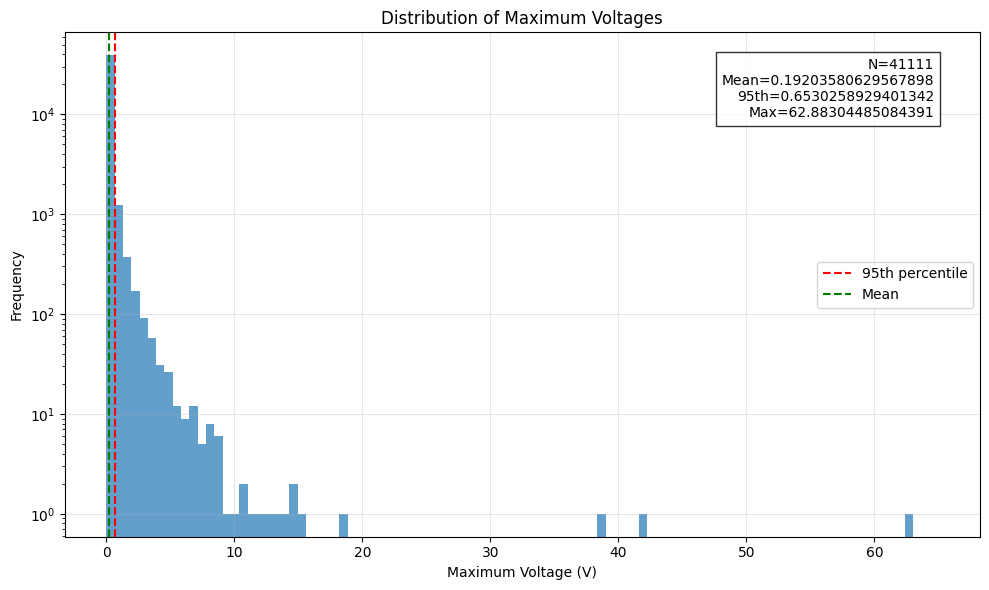

In [26]:
max_vs = np.array(max_vs, dtype=float)  # Convert to numeric array

# Calculate statistics
mean_v = np.mean(max_vs)
std_v = np.std(max_vs)
percentile_95_v = np.percentile(max_vs, 95)
count_v = len(max_vs)

# Create histogram plot
plt.figure(figsize=(10,6))
plt.hist(max_vs, bins = 100 ,range = (0,65), alpha=0.7)
plt.axvline(percentile_95_v, color='r', linestyle='--', label='95th percentile')
plt.axvline(mean_v, color='g', linestyle='--', label='Mean')

# Add labels and title
plt.xlabel('Maximum Voltage (V)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Distribution of Maximum Voltages')
plt.grid(True, alpha=0.3)

# Add statistics annotation
stats_text = f'N={count_v}\nMean={mean_v}\n95th={percentile_95_v}\nMax={np.max(max_vs)}'
plt.annotate(stats_text, xy=(0.95, 0.95), xycoords='axes fraction',
                bbox=dict(facecolor='white', alpha=0.8),
                ha='right', va='top')
print(mean_v)
plt.legend()
plt.tight_layout()

This is problematic, the maximum voltage is not as simple as it seems. It seems to have some weird events where the maximum voltage jumps to 60V which is unrealistic (I think?) I have saved these interesting events in their respective folder.

However, I think for now, I can probably take the mean maximum as the value to divide by.

In [29]:
import glob
import numpy as np

n1_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step1*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n1_runtimes.append(value)
                except Exception:
                    continue

###

n2_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step2*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n2_runtimes.append(value)
                except Exception:
                    continue

###

n3_runtimes = []
for filepath in glob.glob("/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3*.out"):
    with open(filepath, "r") as f:
        # print(f'Looking at file: {filepath}')
        for line in f:
            if "Runtime :" in line:
                try:
                    value = float(line.split(":")[1].split()[0])
                    n3_runtimes.append(value)
                except Exception:
                    continue

if n1_runtimes:
    avg_n1_runtime = np.mean(n1_runtimes)
    std_n1_runtime = np.std(n1_runtimes)
    print(f"Average s1 runtime: {avg_n1_runtime:.2f} s (std: {std_n1_runtime:.2f} s)")
else:
    print("No n1_runtimes found.")

if n2_runtimes:
    avg_n2_runtime = np.mean(n2_runtimes)
    std_n2_runtime = np.std(n2_runtimes)
    print(f"Average s2 runtime: {avg_n2_runtime:.2f} s (std: {std_n2_runtime:.2f} s)")
else:
    print("No n2_runtimes found.")

if n3_runtimes:
    avg_n3_runtime = np.mean(n3_runtimes)
    std_n3_runtime = np.std(n3_runtimes)
    print(f"Average s3 runtime: {avg_n3_runtime:.2f} s (std: {std_n3_runtime:.2f} s)")
else:
    print("No n3_runtimes found.")


Average s1 runtime: 9.56 s (std: 3.32 s)
Average s2 runtime: 1407.22 s (std: 455.73 s)
Average s3 runtime: 0.77 s (std: 0.51 s)


* Average s1 runtime: 9.56 s (std: 3.32 s)
* Average s2 runtime: 1407.22 s (std: 455.73 s)
* Average s3 runtime: 0.77 s (std: 0.51 s)

$\frac{\left(10000\right)\left(9+1407+1\right)}{285}=49719=13.8 hours$

* s4_n1 runtime: 7865.301426649094 s = 2 hours
* s4_n2 runtime: 418.9575426578522 s
* s4_n3 runtime: 1.2776777744293213 s
* s4_n4 runtime: 0 s
* s4_fin runtime: 794 s

# For 20k events (with no interesting events saving due to me being a doofus)

In [3]:
from h5py import File
from pathlib import Path
import numpy as np

album_path = Path('/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm')


with File(album_path / 'n1_album' / 'n1_album.hdf5') as f1:
    n1 = len(f1.keys())

with File(album_path / 'n2_album' / 'n2_album.hdf5') as f2:
    n2 = len(f2.keys())

with File(album_path / 'n3_album' / 'n3_album.hdf5') as f3:
    n3 = len(f3.keys())

try:
    with File(album_path / 'n4_album' / 'n4_album.hdf5') as f4:
        n4 = len(f4.keys())
except Exception as e:
    print('No n4 album found')
    n4 = 0

total = n1 + n2 + n3 + n4
print(f"n1: {n1}, n2: {n2}, n3: {n3}. n4: {n4}, total: {total}")
print(f"Ratios: n1/total = {n1/total * 100:.4f}%, n2/total = {n2/total * 100:.4f}%, n3/total = {n3/total * 100:.4f}%,  n4/total = {n4/total * 100:.4f}%")

n1: 72982, n2: 5994, n3: 169. n4: 5, total: 79150
Ratios: n1/total = 92.2072%, n2/total = 7.5730%, n3/total = 0.2135%,  n4/total = 0.0063%


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import time
import glob
import os

jobs_logs_path = '/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs'


max_vs = []
idx = 0
for file_path in glob.glob(f'{jobs_logs_path}/step3*.out'):
    with open(file_path) as f:
        print(f'\rLength of max_vs = {len(max_vs)}',end='',flush=True)
        for line in f:
            if 'Max hilbert voltage' in line:
                max_v = line.split(':')[1].split()[0]
                max_vs.append(max_v)
                if len(max_vs) == 593792:
                    print(f'Max voltage is found in {file_path} on line: {line}')


Length of max_vs = 593723Max voltage is found in /data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3_5516_1062342.out on line: Max hilbert voltage: 0.0025278006283008005 V

Length of max_vs = 593723Max voltage is found in /data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3_5516_1062342.out on line: Max hilbert voltage: 0.0025278006283008005 V

Length of max_vs = 2069081

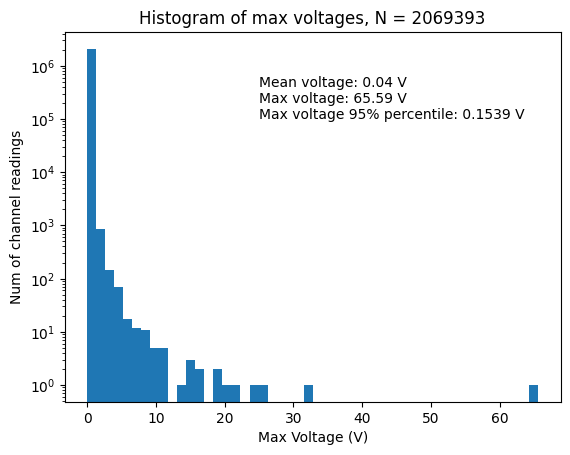

In [52]:
import matplotlib.pyplot as plt
import numpy as np

max_vs = np.array(max_vs, dtype=np.float64)  # Convert to float64 array

mean = np.mean(max_vs)
max_val = np.max(max_vs)
max_v_95th = np.percentile(max_vs,95)

plt.hist(max_vs,bins=50)
plt.title(f'Histogram of max voltages, N = {len(max_vs)}')
plt.yscale('log')
plt.ylabel('Num of channel readings')
plt.xlabel('Max Voltage (V)')
plt.text(25,10e4,f"Mean voltage: {mean:.2f} V\nMax voltage: {max_val:.2f} V\nMax voltage 95% percentile: {max_v_95th:.4f} V");

# # Find indices where voltage equals the maximum value
# max_indices = np.where(max_vs == max_val)[0]

# print(f"Mean voltage: {mean:.2f} V, Max voltage: {max_val:.2f} V, Max voltage 95% percentile: {max_v_95th:.4f} V")
# # print(f"Found {max_indices} event(s) with maximum voltage")

In [36]:
import glob

jobs_logs_path = '/data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs'

out_of_time_window_events = 0

for file_path in glob.glob(f'{jobs_logs_path}/step3*.out'):
    with open(file_path) as f:
        print(f'\rlooking at {file_path}',end='',flush=True)
        for line in f:
            if 'Error! Events detected outside of stipulated time window:' in line:
                out_of_time_window_events +=1

time.sleep(2)

print(f'Number of events in dataset that were outside of time window: {out_of_time_window_events}',flush=True)


looking at /data/condor_shared/users/ssued/RNOG_Image_Builder/jobs/jobs_logs/step3_19996_1076612.outNumber of events in dataset that were outside of time window: 50
Number of events in dataset that were outside of time window: 50
